# Alphalens: intraday factor

In this notebook we use Alphalens to analyse the performance of an intraday factor, which is computed daily but the stocks are bought at marker open and sold at market close with no overnight positions.

In [1]:
%pylab inline --no-import-all
import alphalens
import pandas as pd
import numpy as np
import datetime

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

Below is a simple mapping of tickers to sectors for a small universe of large cap stocks.

In [18]:
sector_names = {
    0 : "information_technology",
    1 : "financials",
    2 : "health_care",
    3 : "industrials",
    4 : "utilities", 
    5 : "real_estate", 
    6 : "materials", 
    7 : "telecommunication_services", 
    8 : "consumer_staples", 
    9 : "consumer_discretionary", 
    10 : "energy" 
}

ticker_sector = {
    "ACN" : 0, "ATVI" : 0, "ADBE" : 0, "AMD" : 0, "AKAM" : 0, "ADS" : 0, "GOOGL" : 0, "GOOG" : 0, 
    "APH" : 0, "ADI" : 0, "ANSS" : 0, "AAPL" : 0, "AMAT" : 0, "ADSK" : 0, "ADP" : 0, "AVGO" : 0,
    "AMG" : 1, "AFL" : 1, "ALL" : 1, "AXP" : 1, "AIG" : 1, "AMP" : 1, "AON" : 1, "AJG" : 1, "AIZ" : 1, "BAC" : 1,
    "BK" : 1, "BBT" : 1, "BRK.B" : 1, "BLK" : 1, "HRB" : 1, "BHF" : 1, "COF" : 1, "CBOE" : 1, "SCHW" : 1, "CB" : 1,
    "ABT" : 2, "ABBV" : 2, "AET" : 2, "A" : 2, "ALXN" : 2, "ALGN" : 2, "AGN" : 2, "ABC" : 2, "AMGN" : 2, "ANTM" : 2,
    "BCR" : 2, "BAX" : 2, "BDX" : 2, "BIIB" : 2, "BSX" : 2, "BMY" : 2, "CAH" : 2, "CELG" : 2, "CNC" : 2, "CERN" : 2,
    "MMM" : 3, "AYI" : 3, "ALK" : 3, "ALLE" : 3, "AAL" : 3, "AME" : 3, "AOS" : 3, "ARNC" : 3, "BA" : 3, "CHRW" : 3,
    "CAT" : 3, "CTAS" : 3, "CSX" : 3, "CMI" : 3, "DE" : 3, "DAL" : 3, "DOV" : 3, "ETN" : 3, "EMR" : 3, "EFX" : 3,
    "AES" : 4, "LNT" : 4, "AEE" : 4, "AEP" : 4, "AWK" : 4, "CNP" : 4, "CMS" : 4, "ED" : 4, "D" : 4, "DTE" : 4,
    "DUK" : 4, "EIX" : 4, "ETR" : 4, "ES" : 4, "EXC" : 4, "FE" : 4, "NEE" : 4, "NI" : 4, "NRG" : 4, "PCG" : 4,
    "ARE" : 5, "AMT" : 5, "AIV" : 5, "AVB" : 5, "BXP" : 5, "CBG" : 5, "CCI" : 5, "DLR" : 5, "DRE" : 5,
    "EQIX" : 5, "EQR" : 5, "ESS" : 5, "EXR" : 5, "FRT" : 5, "GGP" : 5, "HCP" : 5, "HST" : 5, "IRM" : 5, "KIM" : 5,
    "APD" : 6, "ALB" : 6, "AVY" : 6, "BLL" : 6, "CF" : 6, "DWDP" : 6, "EMN" : 6, "ECL" : 6, "FMC" : 6, "FCX" : 6,
    "IP" : 6, "IFF" : 6, "LYB" : 6, "MLM" : 6, "MON" : 6, "MOS" : 6, "NEM" : 6, "NUE" : 6, "PKG" : 6, "PPG" : 6,
    "T" : 7, "CTL" : 7, "VZ" : 7, 
    "MO" : 8, "ADM" : 8, "BF.B" : 8, "CPB" : 8, "CHD" : 8, "CLX" : 8, "KO" : 8, "CL" : 8, "CAG" : 8,
    "STZ" : 8, "COST" : 8, "COTY" : 8, "CVS" : 8, "DPS" : 8, "EL" : 8, "GIS" : 8, "HSY" : 8, "HRL" : 8,
    "AAP" : 9, "AMZN" : 9, "APTV" : 9, "AZO" : 9, "BBY" : 9, "BWA" : 9, "KMX" : 9, "CCL" : 9, 
    "APC" : 10, "ANDV" : 10, "APA" : 10, "BHGE" : 10, "COG" : 10, "CHK" : 10, "CVX" : 10, "XEC" : 10, "CXO" : 10,
    "COP" : 10, "DVN" : 10, "EOG" : 10, "EQT" : 10, "XOM" : 10, "HAL" : 10, "HP" : 10, "HES" : 10, "KMI" : 10
}

In [20]:
import yfinance as yf
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2017, 6, 1)
tickers = list(ticker_sector.keys())
# pan = web.DataReader(tickers, "google", datetime.datetime(2017, 1, 1),  datetime.datetime(2017, 6, 1))
pan = yf.download(tickers, start=start_date, end=end_date)

[**********************69%********               ]  125 of 182 completedFailed to get ticker 'ANTM' reason: ("Connection broken: InvalidChunkLength(got length b'', 0 bytes read)", InvalidChunkLength(got length b'', 0 bytes read))
[*********************100%***********************]  182 of 182 completed

29 Failed downloads:
['BHF', 'HCP']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2017-01-01 00:00:00 -> 2017-06-01 00:00:00) (Yahoo error = "Data doesn\'t exist for startDate = 1483246800, endDate = 1496289600")')
['ABC', 'XEC', 'MON', 'ADS', 'ATVI', 'CXO', 'APC', 'DRE', 'BRK.B', 'AGN', 'ARNC', 'BHGE', 'ANTM', 'CHK', 'CERN', 'BLL', 'COG', 'ALXN', 'BBT', 'CTL', 'CELG', 'DWDP']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['BF.B', 'BCR', 'GGP', 'DPS', 'CBG']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2017-01-01 00:00:00 -> 2017-06-01 00:00:00)')


Our example factor ranks the stocks based on their overnight price gap (yesterday close to today open price). We'll  see if the factor has some alpha or if it is pure noise.

In [21]:
today_open = pan['Open']
today_close = pan['Close']
yesterday_close = today_close.shift(1)

In [22]:
factor = (today_open - yesterday_close) / yesterday_close

The pricing data passed to alphalens should contain the entry price for the assets so it must reflect the next available price after a factor value was observed at a given timestamp. Those prices must not be used in the calculation of the factor values for that time. Always double check to ensure you are not introducing lookahead bias to your study.

The pricing data must also contain the exit price for the assets, for period 1 the price at the next timestamp will be used, for period 2 the price after 2 timestamps will be used and so on.

There are no restrinctions/assumptions on the time frequencies a factor should be computed at and neither on the specific time a factor should be traded (trading at the open vs trading at the close vs intraday trading), it is only required that factor and price DataFrames are properly aligned given the rules above.

In our example, we want to buy the stocks at marker open, so the need the open price at the exact timestamps as the factor valules, and we want to sell the stocks at market close so we will add the close prices too, which will be used to compute period 1 forward returns as they appear just after the factor values timestamps. The returns computed by Alphalens will therefore be based on the difference between open to close assets prices.

If we had other prices we could compute other period returns, for example one hour after market open and 2 hours and so on. We could have added those prices right after the open prices and instruct Alphalens to compute 1, 2, 3... periods too  and not only period 1 like in this example.

In [23]:
# Fix time as Yahoo doesn't set it
today_open.index += pd.Timedelta('9h30m')
today_close.index += pd.Timedelta('16h')
# pricing will contain both open and close
pricing = pd.concat([today_open, today_close]).sort_index()

In [24]:
pricing.head()

Ticker                             A        AAL         AAP       AAPL  \
Date                                                                     
2017-01-03 09:30:00+00:00  45.930000  47.279999  170.779999  28.950001   
2017-01-03 16:00:00+00:00  46.490002  46.299999  170.600006  29.037500   
2017-01-04 09:30:00+00:00  46.930000  46.630001  170.369995  28.962500   
2017-01-04 16:00:00+00:00  47.099998  46.700001  172.000000  29.004999   
2017-01-05 09:30:00+00:00  47.049999  46.520000  170.869995  28.980000   

Ticker                          ABBV  ABC        ABT         ACN        ADBE  \
Date                                                                           
2017-01-03 09:30:00+00:00  62.919998  NaN  38.630001  117.379997  103.430000   
2017-01-03 16:00:00+00:00  62.410000  NaN  39.049999  116.459999  103.480003   
2017-01-04 09:30:00+00:00  62.639999  NaN  39.060001  116.910004  103.739998   
2017-01-04 16:00:00+00:00  63.290001  NaN  39.360001  116.739998  104.139999   
2017-01-05 09:30:00+00:00  63.380001  NaN  39.240002  116.980003  104.129997   

Ticker                           ADI  ...        NUE        PCG        PKG  \
Date                                  ...                                    
2017-01-03 09:30:00+00:00  72.599998  ...  59.740002  60.810001  85.160004   
2017-01-03 16:00:00+00:00  72.510002  ...  59.610001  60.369999  85.000000   
2017-01-04 09:30:00+00:00  72.769997  ...  59.759998  60.610001  85.440002   
2017-01-04 16:00:00+00:00  72.360001  ...  61.250000  60.590000  86.370003   
2017-01-05 09:30:00+00:00  72.410004  ...  61.119999  60.660000  86.370003   

Ticker                           PPG       SCHW         STZ          T  \
Date                                                                     
2017-01-03 09:30:00+00:00  95.430000  40.049999  155.009995  32.243202   
2017-01-03 16:00:00+00:00  95.250000  40.200001  154.750000  32.492447   
2017-01-04 09:30:00+00:00  95.709999  40.400002  157.149994  32.432022   
2017-01-04 16:00:00+00:00  97.269997  41.220001  157.990005  32.303623   
2017-01-05 09:30:00+00:00  96.459999  40.970001  150.550003  32.364048   

Ticker                            VZ  XEC        XOM  
Date                                                  
2017-01-03 09:30:00+00:00  53.959999  NaN  90.940002  
2017-01-03 16:00:00+00:00  54.580002  NaN  90.889999  
2017-01-04 09:30:00+00:00  54.549999  NaN  91.120003  
2017-01-04 16:00:00+00:00  54.520000  NaN  89.889999  
2017-01-05 09:30:00+00:00  54.779999  NaN  90.190002  

[5 rows x 182 columns]

In [25]:
# Align factor to open price
factor.index += pd.Timedelta('9h30m')
factor = factor.stack()
factor.index = factor.index.set_names(['date', 'asset'])

In [26]:
factor.unstack().head()

asset                             A       AAL       AAP      AAPL      ABBV  \
date                                                                          
2017-01-04 09:30:00+00:00  0.009464  0.007127 -0.001348 -0.002583  0.003685   
2017-01-05 09:30:00+00:00 -0.001062 -0.003854 -0.006570 -0.000862  0.001422   
2017-01-06 09:30:00+00:00  0.001934 -0.000872 -0.003258  0.001458  0.001725   
2017-01-09 09:30:00+00:00  0.000417 -0.004328  0.002535  0.000339  0.000157   
2017-01-10 09:30:00+00:00  0.004155 -0.001699 -0.004896 -0.001849 -0.002492   

asset                           ABT       ACN      ADBE       ADI       ADM  \
date                                                                          
2017-01-04 09:30:00+00:00  0.000256  0.003864  0.002513  0.003586  0.004113   
2017-01-05 09:30:00+00:00 -0.003049  0.002056 -0.000096  0.000691 -0.000217   
2017-01-06 09:30:00+00:00  0.000000  0.000000  0.000661  0.003646 -0.016386   
2017-01-09 09:30:00+00:00  0.000245 -0.001376 -0.003139  0.000559 -0.004696   
2017-01-10 09:30:00+00:00  0.001718 -0.000522  0.000000 -0.000973  0.001117   

asset                      ...       NRG       NUE       PCG       PKG  \
date                       ...                                           
2017-01-04 09:30:00+00:00  ...  0.001626  0.002516  0.003976  0.005176   
2017-01-05 09:30:00+00:00  ... -0.001535 -0.002122  0.001155  0.000000   
2017-01-06 09:30:00+00:00  ...  0.002259 -0.000328 -0.003304  0.000469   
2017-01-09 09:30:00+00:00  ... -0.000748  0.009786 -0.000327 -0.003440   
2017-01-10 09:30:00+00:00  ... -0.002970  0.012743  0.000498 -0.000798   

asset                           PPG      SCHW       STZ         T        VZ  \
date                                                                          
2017-01-04 09:30:00+00:00  0.004829  0.004975  0.015509 -0.001860 -0.000550   
2017-01-05 09:30:00+00:00 -0.008327 -0.006065 -0.047092  0.001871  0.004769   
2017-01-06 09:30:00+00:00  0.001569  0.008055  0.001635 -0.015709 -0.017753   
2017-01-09 09:30:00+00:00 -0.005649 -0.005578  0.003747 -0.000726 -0.000751   
2017-01-10 09:30:00+00:00 -0.002906  0.001702 -0.001797 -0.003431  0.000190   

asset                           XOM  
date                                 
2017-01-04 09:30:00+00:00  0.002531  
2017-01-05 09:30:00+00:00  0.003337  
2017-01-06 09:30:00+00:00  0.002710  
2017-01-09 09:30:00+00:00 -0.003164  
2017-01-10 09:30:00+00:00  0.001494  

[5 rows x 153 columns]

# Run Alphalens

Period 1 will show returns from market open to market close while period 2 will show returns from today open to tomorrow open

In [27]:
non_predictive_factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor, 
                                                                                  pricing, 
                                                                                  periods=(1,2),
                                                                                  groupby=ticker_sector,
                                                                                  groupby_labels=sector_names)

Dropped 2.9% entries from factor data: 1.0% in forward returns computation and 2.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Returns Analysis


6h30m     1D
Ann. alpha                                     0.287 -0.043
beta                                           0.159  0.155
Mean Period Wise Return Top Quantile (bps)    -7.544 -2.207
Mean Period Wise Return Bottom Quantile (bps)  0.288  0.944
Mean Period Wise Spread (bps)                 -7.832 -3.153

<Figure size 640x480 with 0 Axes>

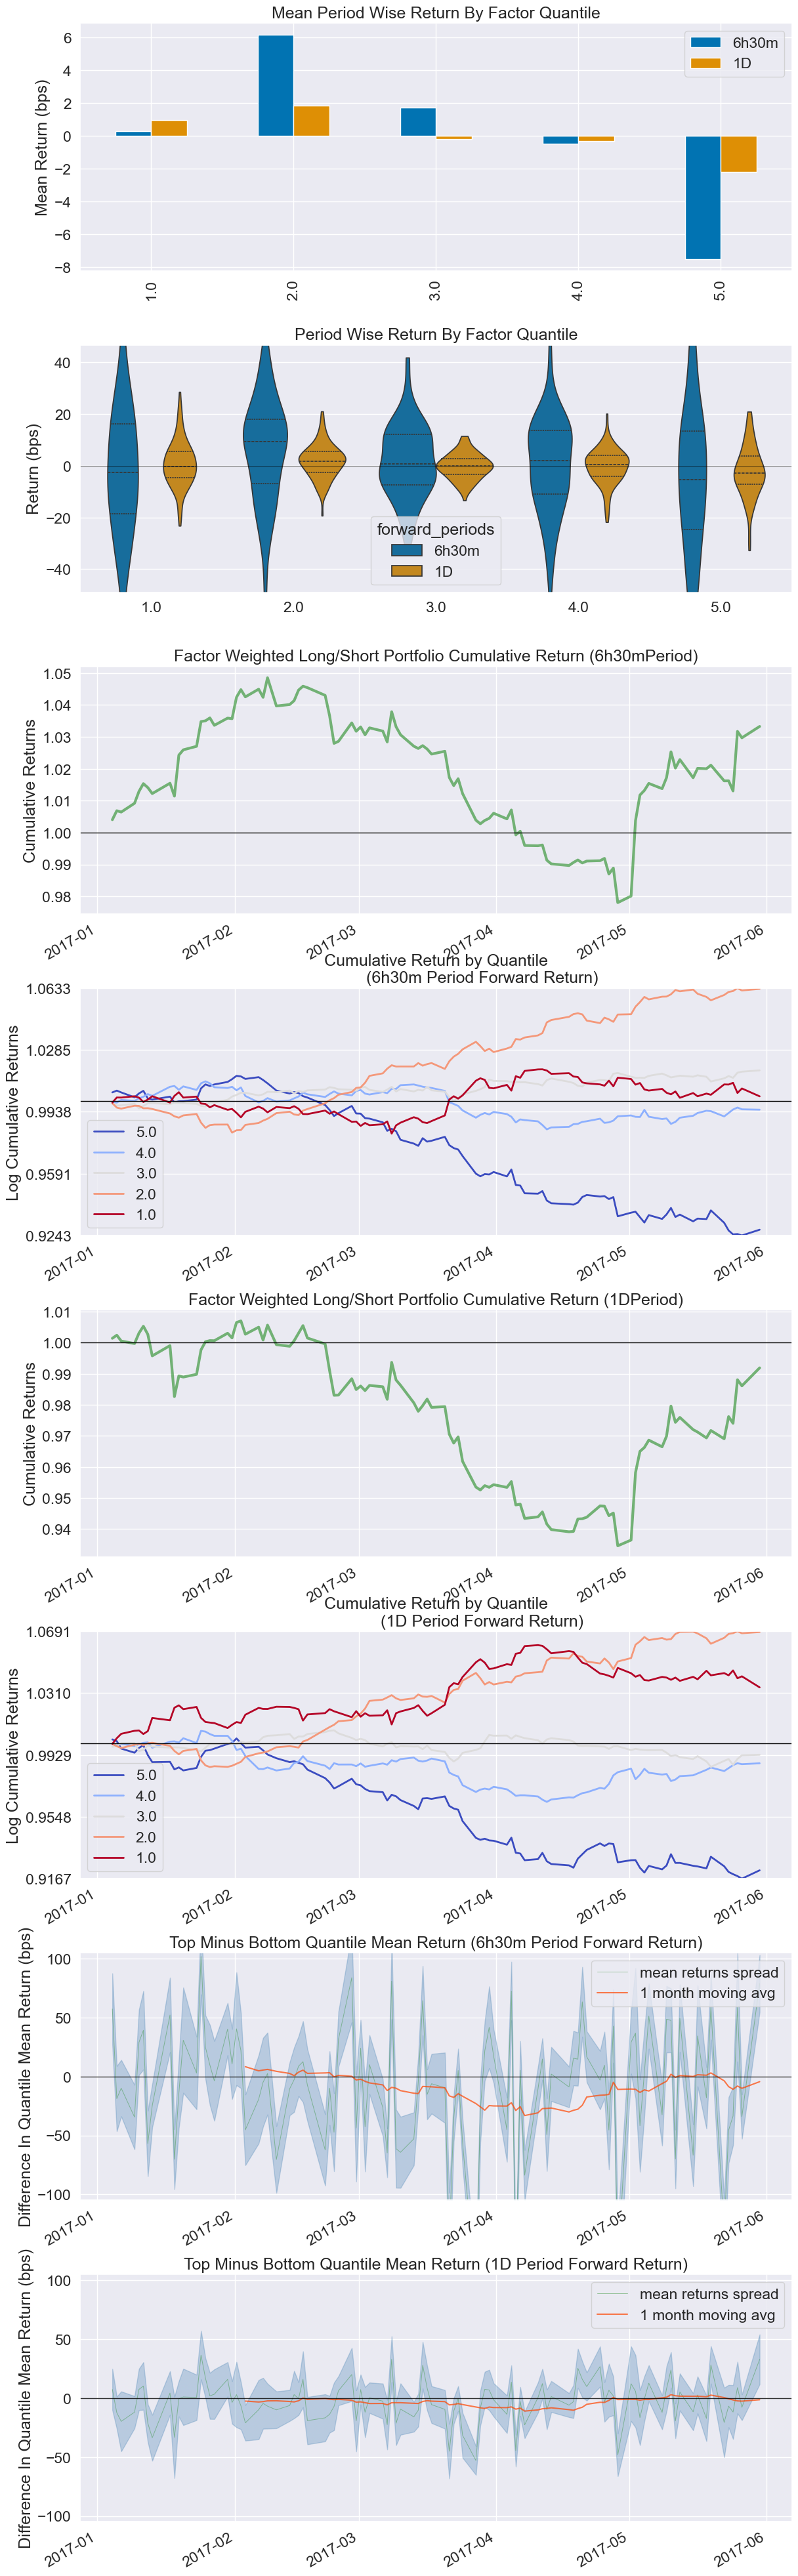

In [28]:
alphalens.tears.create_returns_tear_sheet(non_predictive_factor_data)

series =  Ticker        CHD        AAL        APA         EFX         CMI        LNT  \
-2      44.250000  47.279999  64.709999  118.589996  138.250000  37.939999   
-1      44.340000  46.299999  63.779999  118.760002  139.789993  37.930000   
0       44.520000  46.630001  63.869999  118.680000  139.880005  38.009998   
1       44.700001  46.700001  63.590000  119.339996  139.630005  38.160000   
2       44.709999  46.520000  63.799999  119.540001  139.160004  38.220001   
3       44.889999  45.889999  63.250000  119.980003  137.750000  38.110001   
4       44.869999  45.849998  63.520000  119.980003  138.259995  37.959999   
5       44.869999  46.209999  63.119999  121.000000  138.720001  37.799999   
6       44.650002  46.009998  62.730000  121.000000  139.809998  37.860001   
7       44.299999  47.080002  62.360001  119.839996  137.419998  37.279999   
8       44.360001  47.000000  62.630001  119.730003  138.360001  37.270000   
9       43.580002  48.480000  62.869999  120.040001  1

<Figure size 640x480 with 0 Axes>

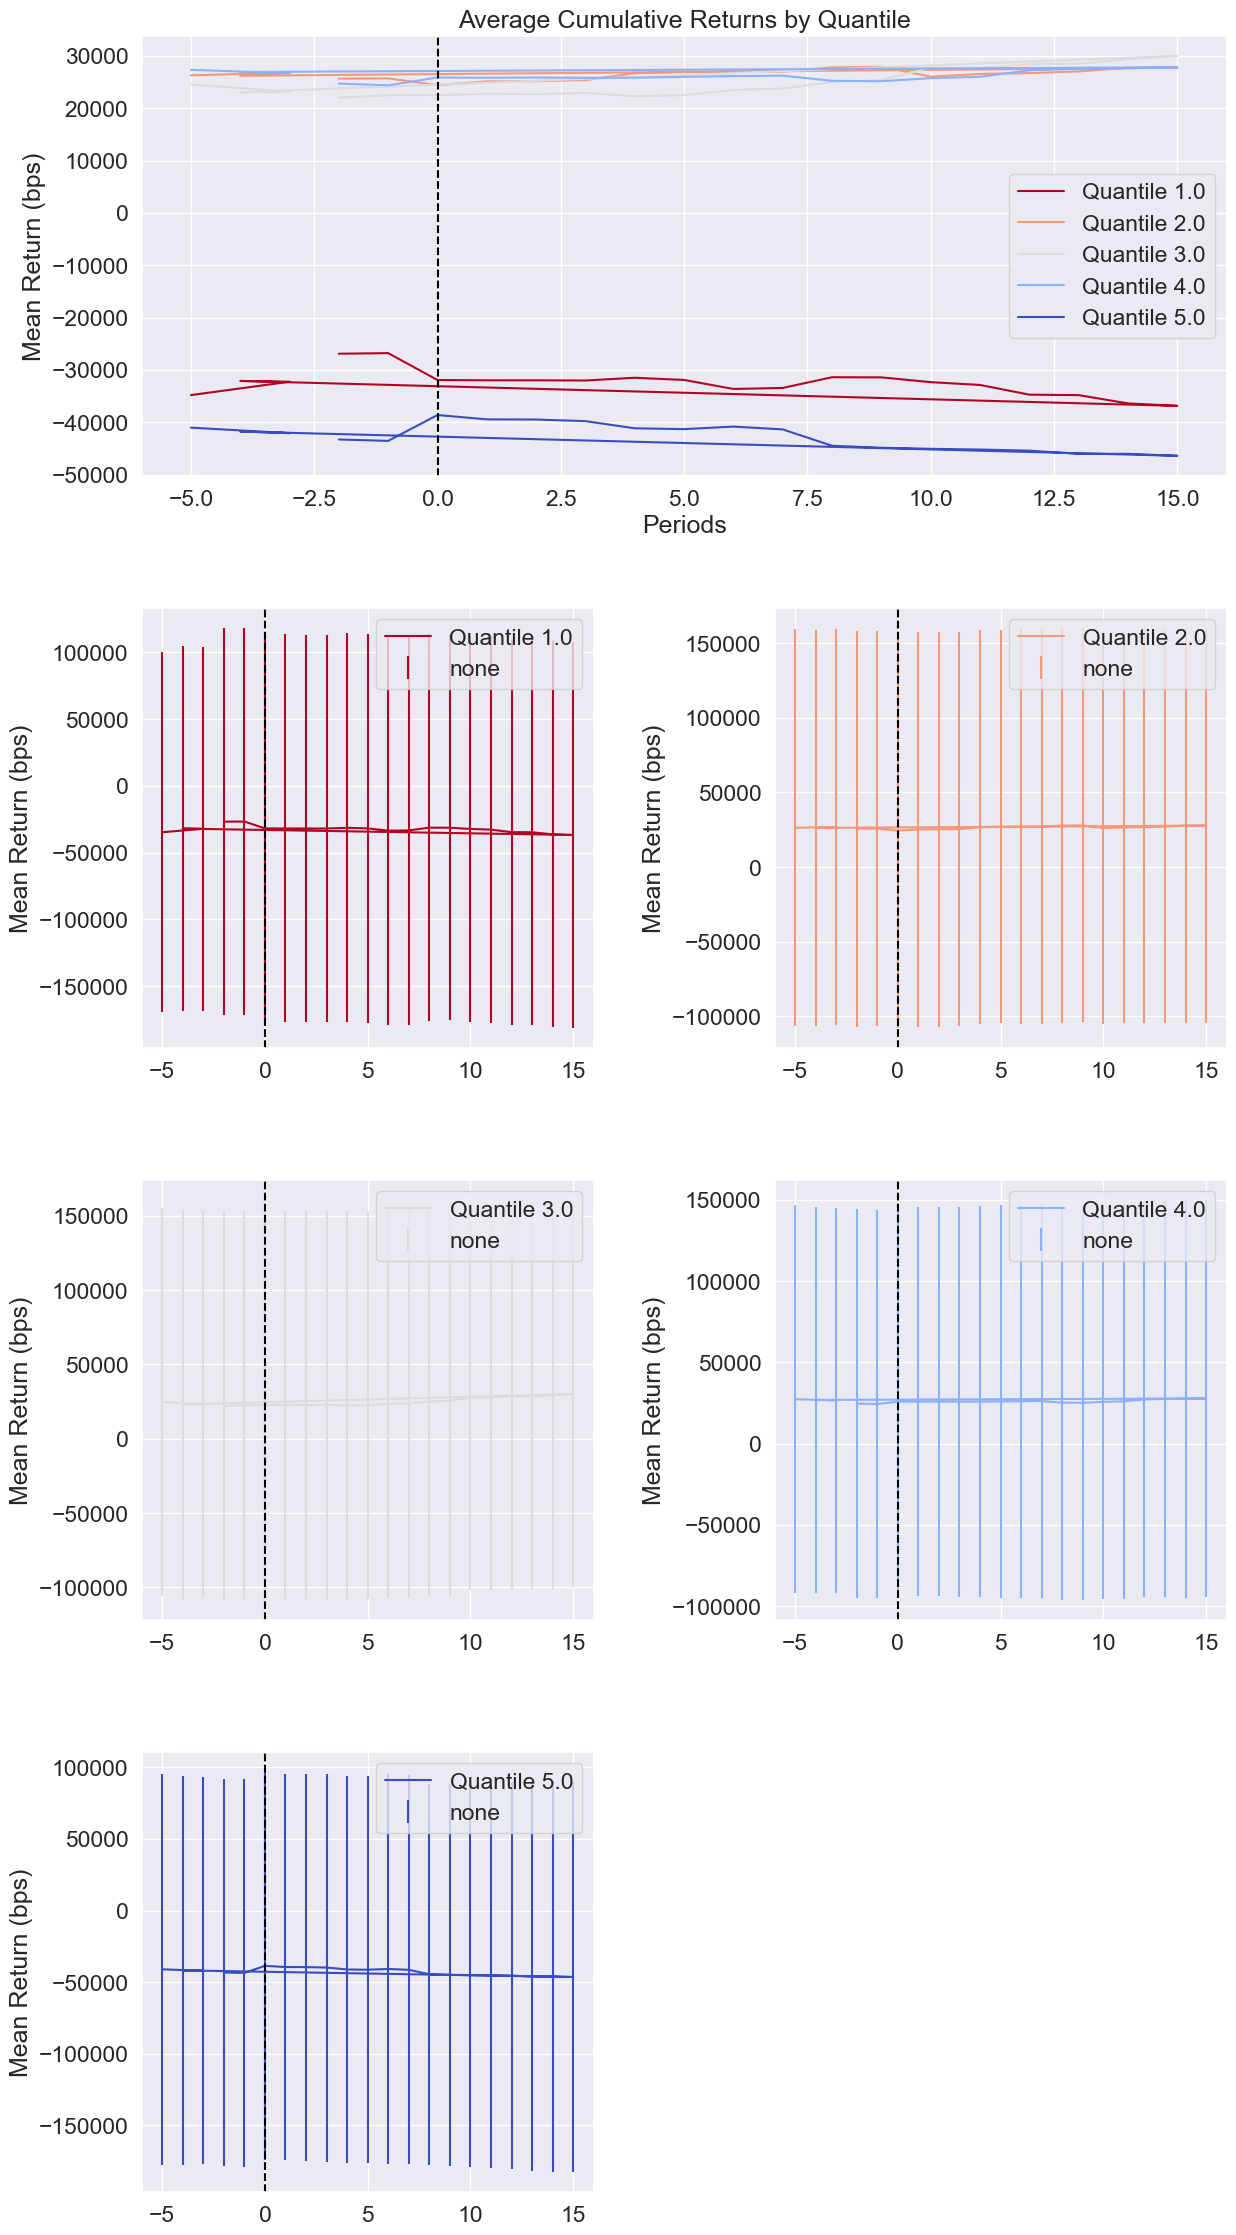

In [29]:
alphalens.tears.create_event_returns_tear_sheet(non_predictive_factor_data, pricing)